# 미국 Major League 데이터 분석

baseball.csv 파일을 오늘 배운 것들을 활용하여 분석해보자.

### 데이터

baseball.csv

데이터 : 1962~2012년 MLB 야구 팀들의 성적 데이터

  
컬럼 설명 :

<pre>

* G : 게임수
* W : 승수
* T : 무승부(tie)
* D : 패배(Depeat)  
* WR : 승률
* PW : 기대승률(피타고라스 승률?)
* R/G : 게임당 득점
* RS : 총 득점
* RA : 총 실점
* BA : 타율
* OBP : 출루율
* SLG : 장타율
* OOBP : 상대의 출루율
* OSLG : 상대의 장타율

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
base = pd.read_csv('/content/sample_data/baseball.csv')
kbo = pd.read_csv("/content/sample_data/KBO_WD_2015_18.csv")

In [5]:
print(base.dtypes, kbo.dtypes)
print(base.info, kbo.info)

Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object year      int64
rank      int64
team     object
G         int64
W         int64
T         int64
D         int64
WR      float64
PW      float64
R/G     float64
RS        int64
RA        int64
BA      float64
OBP     float64
SLG     float64
OOBP    float64
OSLG    float64
OPS     float64
dtype: object
<bound method DataFrame.info of      Team League  Year   RS   RA  ...  RankSeason  RankPlayoffs    G   OOBP   OSLG
0     ARI     NL  2012  734  688  ...         NaN           NaN  162  0.317  0.415
1     ATL     NL  2012  700  600  ...         4.0           5.0  162  0.306  0.378
2     BAL     AL  2012  712  705  ...      

In [16]:
print(base.columns)
print(kbo.columns)

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')
Index(['year', 'rank', 'team', 'G', 'W', 'T', 'D', 'WR', 'PW', 'R/G', 'RS',
       'RA', 'BA', 'OBP', 'SLG', 'OOBP', 'OSLG', 'OPS'],
      dtype='object')


In [4]:
# 결측치 확인
print(base.isnull().sum())
print(kbo.isnull().sum())

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64
year    0
rank    0
team    0
G       0
W       0
T       0
D       0
WR      0
PW      0
R/G     0
RS      0
RA      0
BA      0
OBP     0
SLG     0
OOBP    0
OSLG    0
OPS     0
dtype: int64


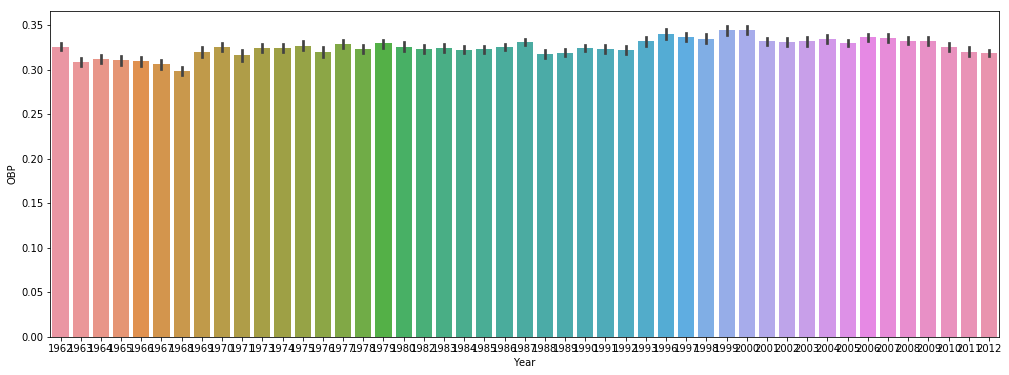

In [20]:
plt.figure(figsize=(17,6))
sns.barplot(x='Year', y='OBP', data=base)

In [29]:
a = base.groupby('Team').median()['W'].sort_values(ascending=False)
a

Team
NYY    92.0
TBR    91.0
LAA    89.0
SFG    88.0
LAD    87.0
MLN    86.0
STL    86.0
BOS    86.0
ATL    85.0
BAL    85.0
CIN    85.0
OAK    84.0
TOR    84.0
DET    84.0
PHI    84.0
CHW    83.0
ANA    83.0
MIN    82.0
ARI    82.0
HOU    81.0
PIT    80.0
FLA    79.0
TEX    79.0
MON    78.5
CLE    78.0
CHC    77.0
MIL    77.0
NYM    77.0
KCR    76.5
CAL    76.0
SDP    75.5
SEA    75.0
COL    74.0
WSN    72.0
MIA    69.0
WSA    67.5
KCA    67.0
TBD    64.5
SEP    64.0
Name: W, dtype: float64

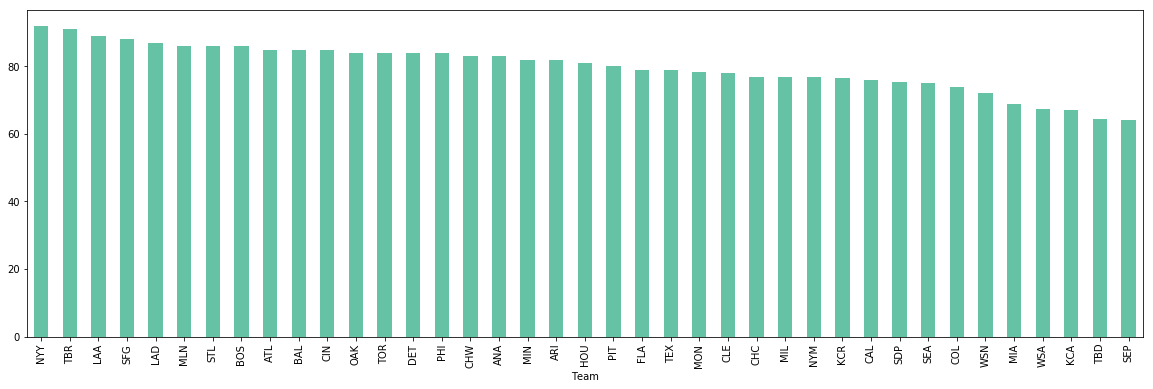

In [35]:
ax = plt.subplot()
a.plot(kind='bar', figsize=(20,6),ax=ax,
       cmap=plt.cm.Set2)

In [38]:
# kbo리그
b = kbo.groupby('team').mean()['WR'].sort_values(ascending=False)
b

team
두산     0.61025
NC     0.53775
넥센     0.52250
KIA    0.51225
SK     0.50850
롯데     0.49050
삼성     0.48700
LG     0.47900
한화     0.47625
kt     0.37550
Name: WR, dtype: float64

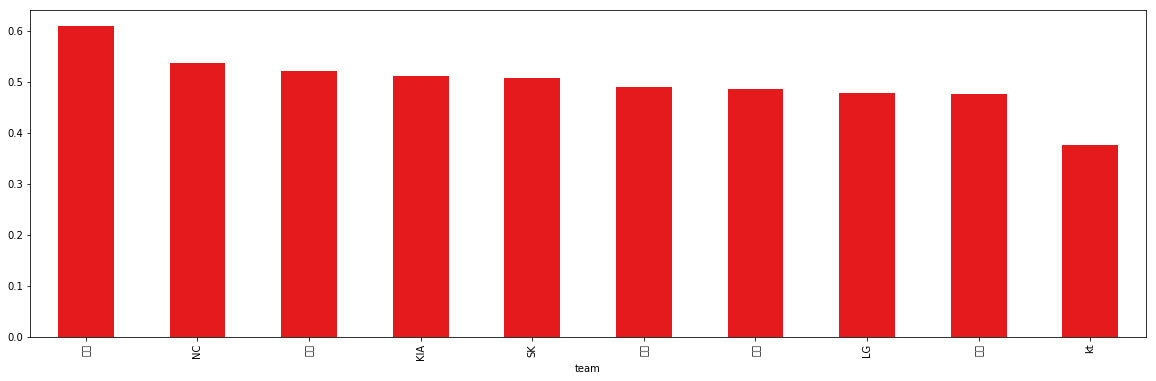

In [39]:
ax = plt.subplot()
b.plot(kind='bar', figsize=(20,6),ax=ax,
       cmap=plt.cm.Set1)

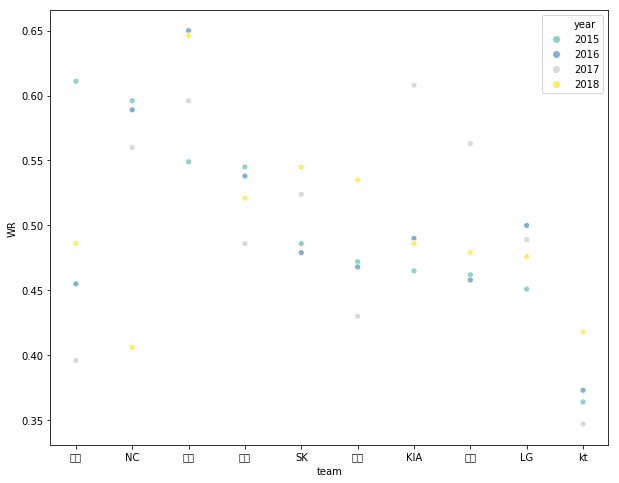

In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'team', y = 'WR', hue='year', data=kbo,
                palette='Set3')

In [0]:
corr = kbo.corr()
corru = base.corr()

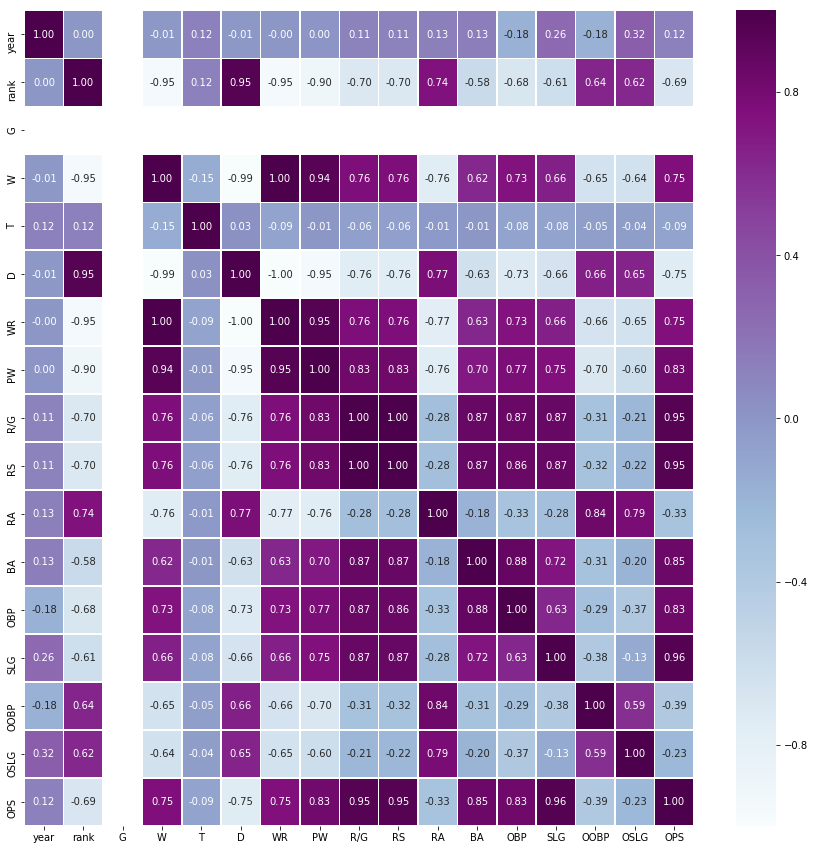

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True,fmt = '.2f', linewidths=.5, cmap='BuPu')

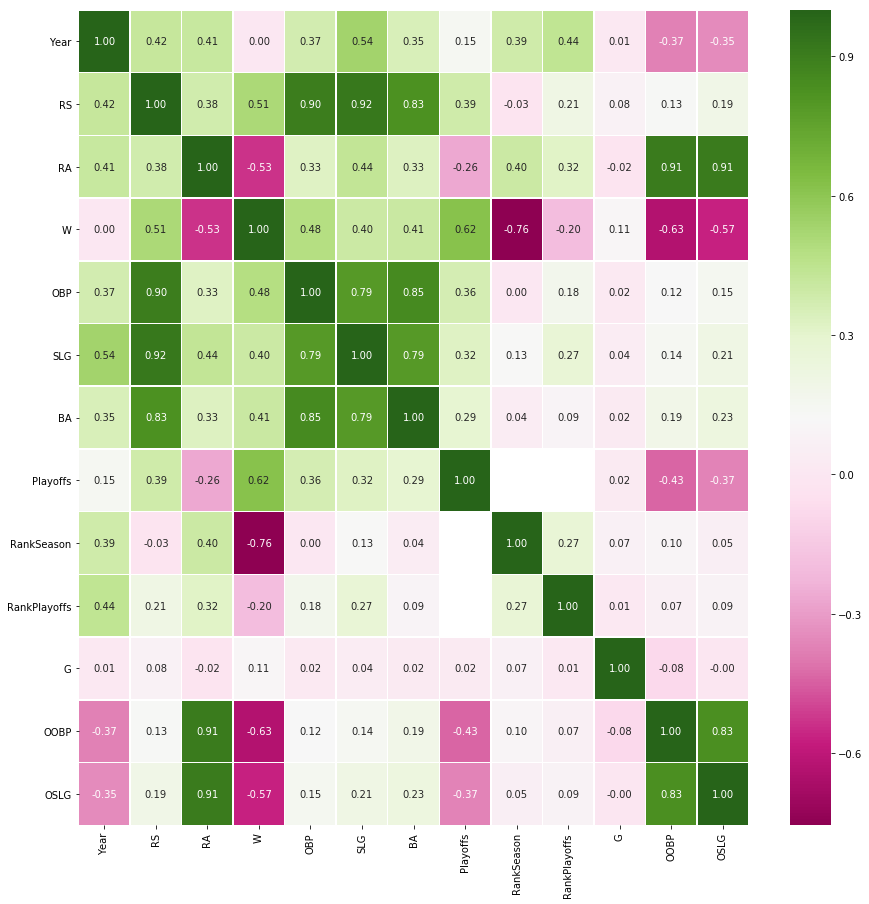

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corru, annot=True,fmt = '.2f', linewidths=.5, cmap='PiYG')